# Visualization_Cost_of_Living

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("cleaned_cost_of_living.csv")
df

,city,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index,year,country,global_rank
0,Zurich,112.5,68.1,93.2,113.9,110.4,167.3,2025,Switzerland,1
1,Geneva,111.4,63.7,90.6,113.8,113.4,171.0,2025,Switzerland,2
2,Basel,110.7,49.1,83.9,116.2,108.4,194.8,2025,Switzerland,3
3,Lausanne,110.5,48.3,83.4,110.7,111.3,180.4,2025,Switzerland,4
4,Lugano,108.4,41.2,79.1,111.0,111.4,159.7,2025,Switzerland,5
...,...,...,...,...,...,...,...,...,...,...
4960,Kochi,25.3,4.6,15.2,29.1,12.2,51.0,2015,India,352
4961,Bhubaneswar,24.9,5.1,15.2,26.1,16.5,50.5,2015,India,353
4962,Ludhiana,24.9,5.4,15.3,25.8,15.6,51.9,2015,India,353
4963,Coimbatore,22.6,5.5,14.2,25.1,12.8,52.1,2015,India,354


In [12]:
df.shape

(4965, 10)

In [20]:
df["country"].unique

<bound method Series.unique of 0       Switzerland
1       Switzerland
2       Switzerland
3       Switzerland
4       Switzerland
           ...     
4960          India
4961          India
4962          India
4963          India
4964          India
Name: country, Length: 4965, dtype: object>

In [26]:
df["country"].nunique()

190

In [28]:
# Splitting columns into numerical and categorical variables
numerical_df = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_df = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:",numerical_df)
print('-' * 60)
print("Categorical Columns:",categorical_df)

Numerical Columns: ['cost_of_living_index', 'rent_index', 'cost_of_living_plus_rent_index', 'groceries_index', 'restaurant_price_index', 'local_purchasing_power_index', 'year', 'global_rank']
------------------------------------------------------------
Categorical Columns: ['city', 'country']


### Types of Data in the Dataset

The dataset consists of two major types of variables: **Categorical** and **Numerical**.

#### 1. Categorical Variables
These variables represent qualitative data and are used for grouping and classification.
- `city`
- `country`

#### 2. Numerical Variables
These variables represent quantitative data and are further classified into continuous and discrete types.

##### Continuous Variables
These variables can take any real numerical value and are used for statistical analysis.
- `cost_of_living_index`
- `rent_index`
- `cost_of_living_plus_rent_index`
- `groceries_index`
- `restaurant_price_index`
- `local_purchasing_power_index`

##### Discrete / Ordinal Variables
These variables represent ordered or countable values.
- `year`
- `global_rank`


### Univariate Analysis – Numerical Variables

#### 1. Calculate Central Tendency

In [39]:
df['cost_of_living_index'].mean(), df['cost_of_living_index'].median()

(np.float64(58.65701913393756), 61.4)

#### 2. Calculate Measures of Dispersion

In [42]:
df['cost_of_living_index'].min(), df['cost_of_living_index'].max(), df['cost_of_living_index'].std()

(15.1, 163.6, 21.878360006176592)

#### 3. Statistical Summary

In [45]:
df['cost_of_living_index'].describe()

count    4965.000000
mean       58.657019
std        21.878360
min        15.100000
25%        39.500000
50%        61.400000
75%        73.800000
max       163.600000
Name: cost_of_living_index, dtype: float64

#### 4.Histogram and KDE

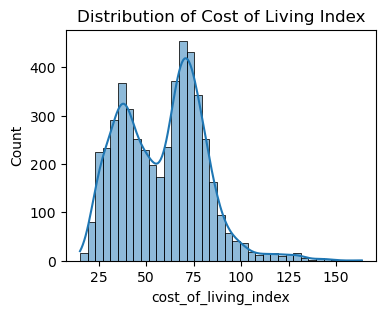

In [48]:
plt.figure(figsize=(4,3))
sns.histplot(df['cost_of_living_index'], kde=True)
plt.title('Distribution of Cost of Living Index')
plt.show()

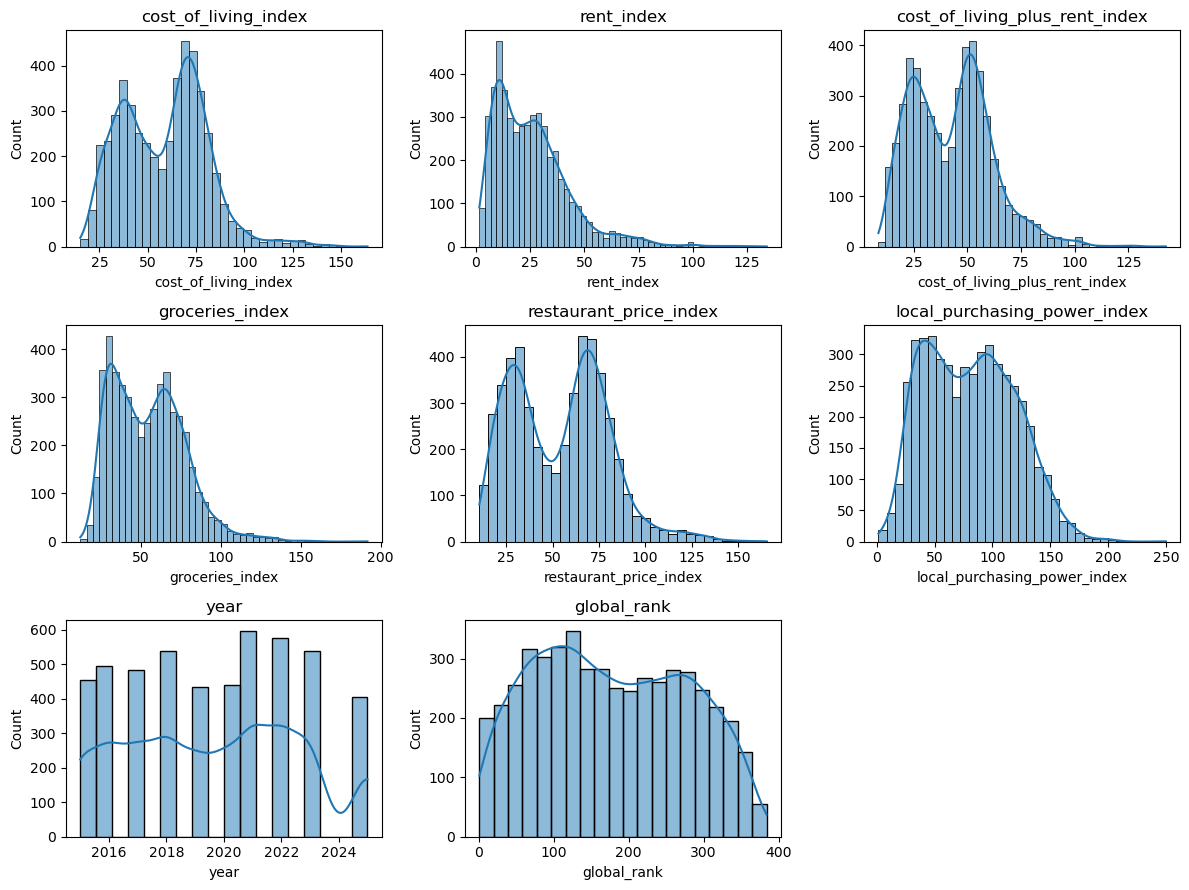

In [58]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
import math
cols = 3
rows = math.ceil(len(numerical_cols) / cols)

plt.figure(figsize=(cols * 4, rows * 3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col}')
    plt.tight_layout()

plt.show()

#### 5.Box Plot (Outliers)

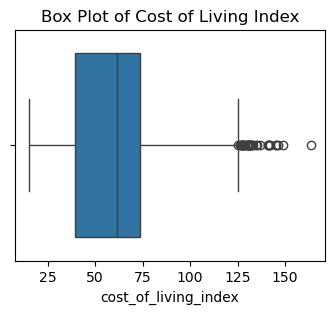

In [64]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df['cost_of_living_index'])
plt.title('Box Plot of Cost of Living Index')
plt.show()

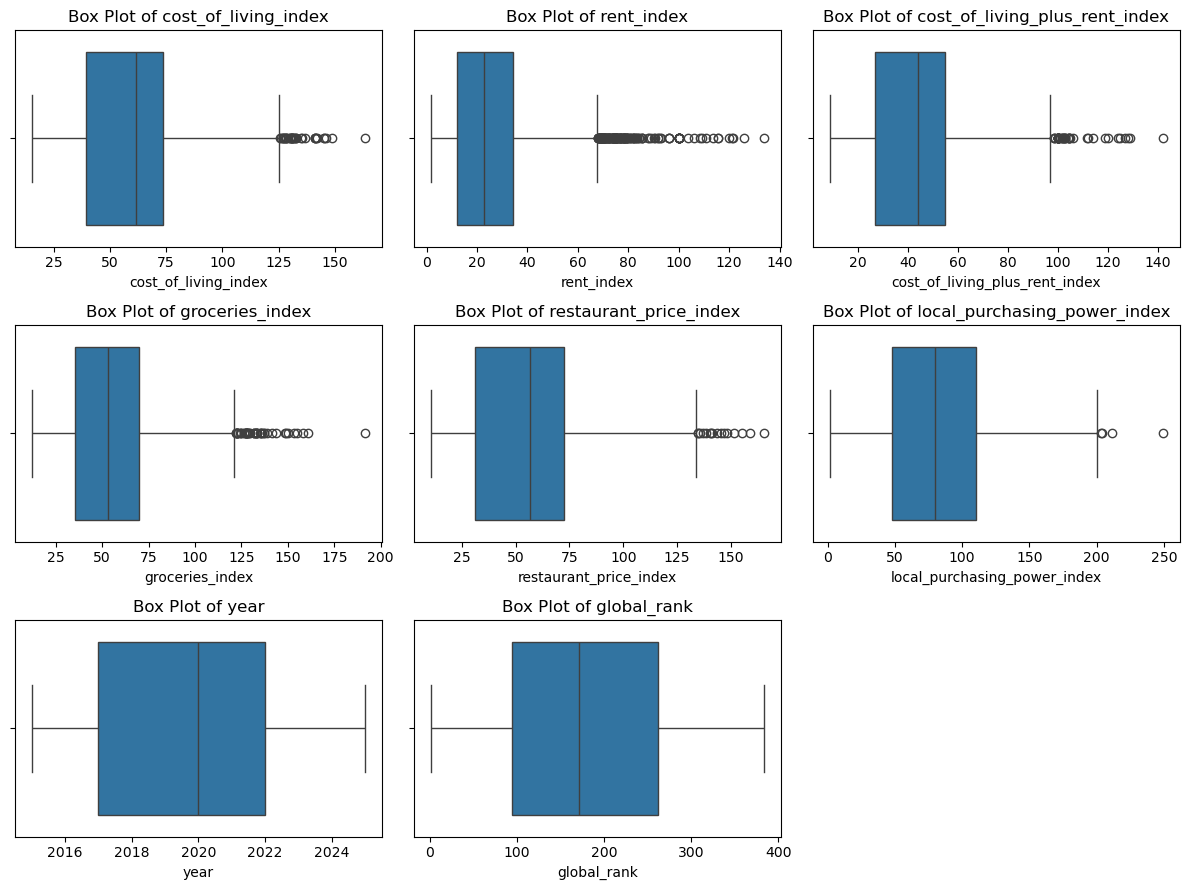

In [68]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
import math
cols = 3
rows = math.ceil(len(numerical_cols) / cols)

plt.figure(figsize=(cols * 4, rows * 3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()

#### 6. Violin Plots

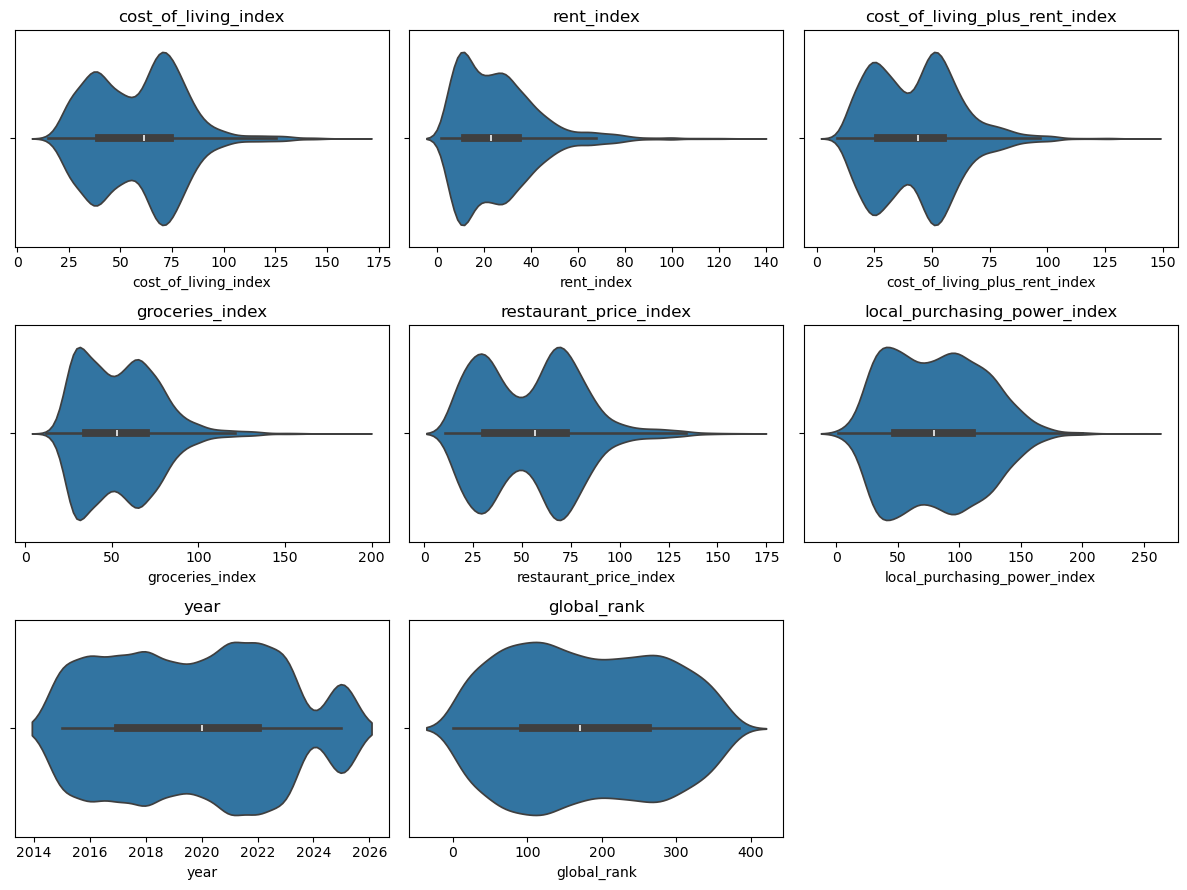

In [71]:
plt.figure(figsize=(cols*4, rows*3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.violinplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Univariate Analysis – Categorical Variables

#### 1. Select a Categorical Variable

In [80]:
df['country'].head()

0    Switzerland
1    Switzerland
2    Switzerland
3    Switzerland
4    Switzerland
Name: country, dtype: object

#### 2. Frequency distribution

In [83]:
df['country'].value_counts()

country
India               302
United Kingdom      263
Canada              232
Germany             185
Italy               146
                   ... 
Angola                1
Papua New Guinea      1
AB Canada             1
Laos                  1
Tajikistan            1
Name: count, Length: 190, dtype: int64

#### 3. Percentage Distribution

In [86]:
(df['country'].value_counts(normalize=True) * 100)

country
India               6.082578
United Kingdom      5.297080
Canada              4.672709
Germany             3.726083
Italy               2.940584
                      ...   
Angola              0.020141
Papua New Guinea    0.020141
AB Canada           0.020141
Laos                0.020141
Tajikistan          0.020141
Name: proportion, Length: 190, dtype: float64

#### 5. Top 10 Countries by City Count(Count Plot)

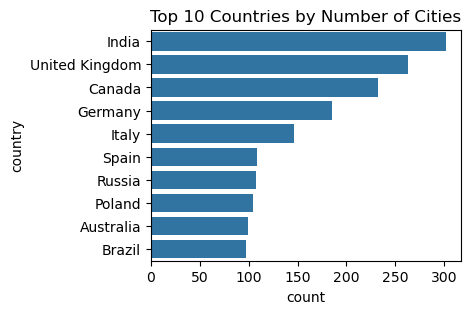

In [92]:
plt.figure(figsize=(4,3))
sns.countplot(
    y=df['country'],
    order=df['country'].value_counts().head(10).index)
plt.title('Top 10 Countries by Number of Cities')
plt.show()

#### 6. Country Contribution (Pie Chart)

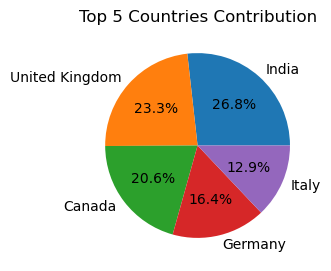

In [95]:
plt.figure(figsize=(4,3))
df['country'].value_counts().head(5).plot(
    kind='pie',autopct='%1.1f%%')
plt.title('Top 5 Countries Contribution')
plt.ylabel('')
plt.show()

### Bivariate Analysis – Numerical vs Numerical

#### 1. Scatter Plot (Rent Index vs Cost of Living Index)

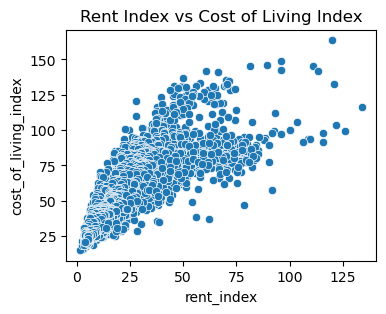

In [105]:
plt.figure(figsize=(4,3))
sns.scatterplot(
    x='rent_index',
    y='cost_of_living_index',
    data=df)
plt.title('Rent Index vs Cost of Living Index')
plt.show()

#### 2. Correlation Heatmap

In [ ]:
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [109]:
numerical_cols = [
    'cost_of_living_index',
    'rent_index',
    'cost_of_living_plus_rent_index',
    'groceries_index',
    'restaurant_price_index',
    'local_purchasing_power_index'
]
corr_matrix = df[numerical_cols].corr()
corr_matrix

,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
cost_of_living_index,1.000000,0.797114,0.962765,0.953732,0.948738,0.616928
rent_index,0.797114,1.000000,0.930196,0.784615,0.761184,0.562697
cost_of_living_plus_rent_index,0.962765,0.930196,1.000000,0.930006,0.916540,0.629187
groceries_index,0.953732,0.784615,0.930006,1.000000,0.857654,0.621648
restaurant_price_index,0.948738,0.761184,0.916540,0.857654,1.000000,0.628049
local_purchasing_power_index,0.616928,0.562697,0.629187,0.621648,0.628049,1.000000


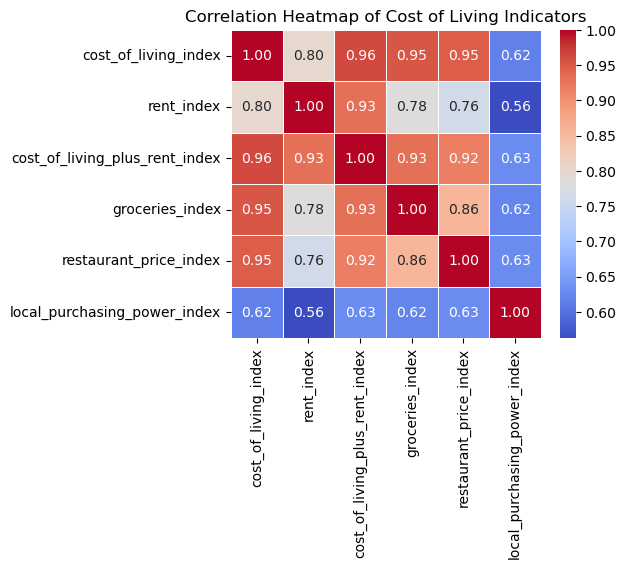

In [113]:
plt.figure(figsize=(5,4))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5)
plt.title('Correlation Heatmap of Cost of Living Indicators')
plt.show()

### Bivariate Analysis – Categorical vs Numerical

#### 1. Cost of Living by Country (Top 10)

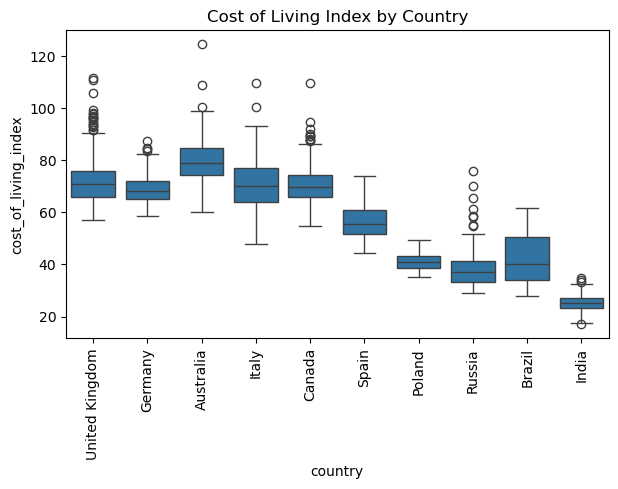

In [116]:
top_countries = df['country'].value_counts().head(10).index

plt.figure(figsize=(7,4))
sns.boxplot(
    x='country',
    y='cost_of_living_index',
    data=df[df['country'].isin(top_countries)])
plt.xticks(rotation=90)
plt.title('Cost of Living Index by Country')
plt.show()


#### 2. Violin Plot – Country vs Cost of Living

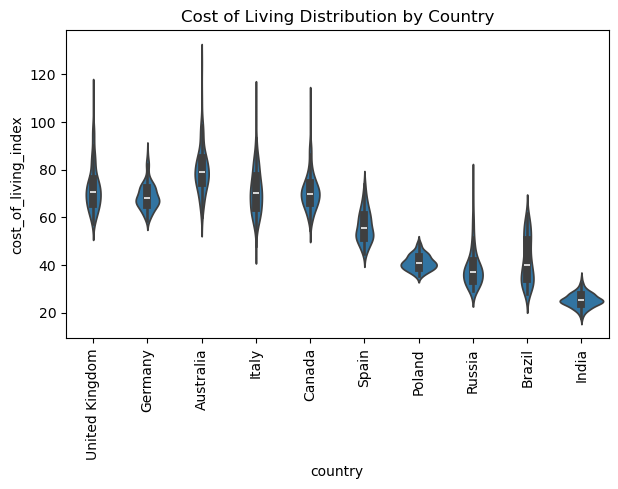

In [122]:
plt.figure(figsize=(7,4))
sns.violinplot(
    x='country',
    y='cost_of_living_index',
    data=df[df['country'].isin(top_countries)]
)
plt.xticks(rotation=90)
plt.title('Cost of Living Distribution by Country')
plt.show()

#### 3. Bar Plot – Average Cost of Living by Country (Top 10)

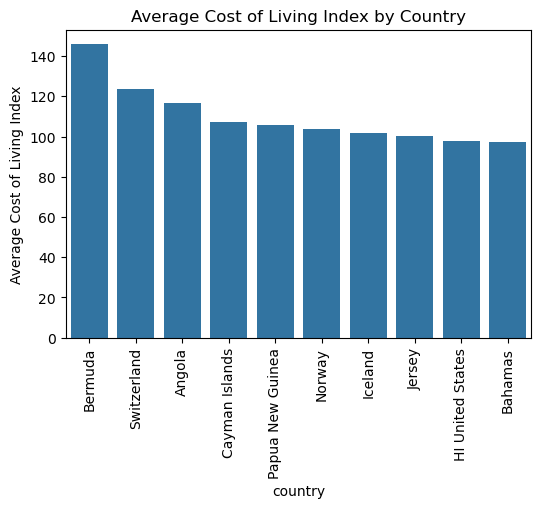

In [133]:
country_avg = (
    df.groupby('country')['cost_of_living_index']
      .mean()
      .sort_values(ascending=False)
      .head(10))

plt.figure(figsize=(6,4))
sns.barplot(
    x=country_avg.index,
    y=country_avg.values)
plt.xticks(rotation=90)
plt.title('Average Cost of Living Index by Country')
plt.ylabel('Average Cost of Living Index')
plt.show()

### Bivariate Analysis – Categorical vs Discrete Variable (Time)

In [125]:
pivot_table = pd.pivot_table(
    df[df['country'].isin(top_countries)],
    values='cost_of_living_index',
    index='country',
    columns='year',
    aggfunc='mean'
)
pivot_table

year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2025
country,,,,,,,,,,
Australia,99.927273,79.225000,80.290909,83.290909,71.487500,73.530000,84.310000,77.600000,77.837500,64.562500
Brazil,54.941667,39.230000,54.088889,53.320000,44.277778,41.150000,32.192308,34.571429,36.090000,30.590909
Canada,85.319231,65.921739,70.900000,73.489286,65.572222,68.468750,71.517857,71.434615,67.168000,61.294118
Germany,77.610000,67.435714,67.560000,75.405556,68.318750,65.905556,71.717391,67.284615,65.045000,66.232000
India,27.431034,25.112500,25.900000,27.650000,24.406667,25.068750,25.813889,25.376087,23.578261,20.447368
Italy,85.081250,68.993333,77.072222,79.909091,70.214286,67.000000,73.252941,67.678947,63.294737,59.746667
Poland,44.344444,38.663636,37.860000,45.490909,39.690909,40.145455,42.091667,40.670000,39.354545,43.937500
Russia,51.835714,40.225000,40.860000,42.642857,35.300000,37.938095,32.713043,34.775000,40.542857,37.000000
Spain,67.087500,55.460000,56.570000,62.572727,55.590909,54.070000,60.125000,54.757143,50.512500,50.814286


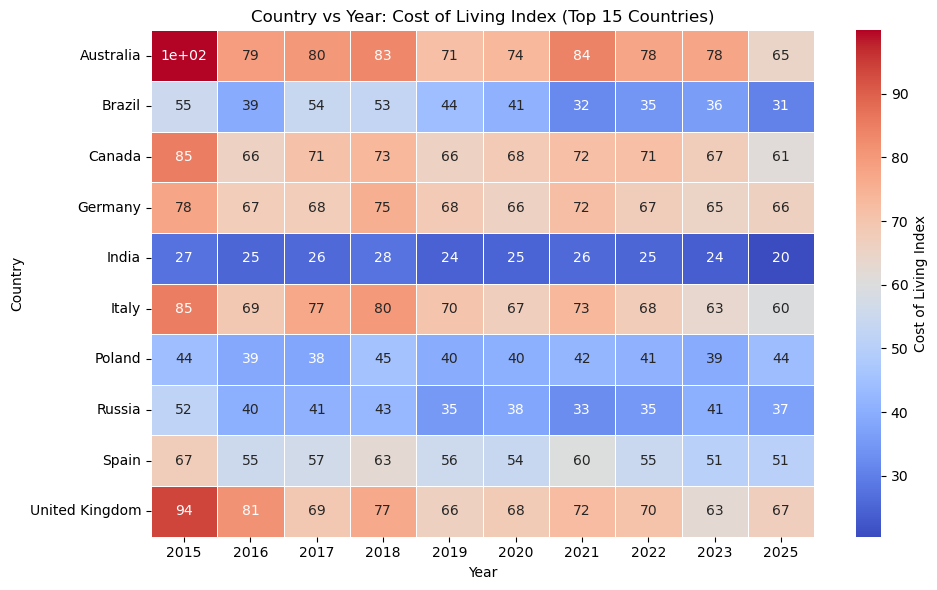

In [131]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='white',
    annot=True,
    cbar_kws={'label': 'Cost of Living Index'})

plt.title('Country vs Year: Cost of Living Index (Top 15 Countries)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Visualization Conclusion

- Living costs vary widely across cities, countries, and years.
- Rent plays a major role in increasing overall living costs.
- Purchasing power does not always rise with higher cost of living.
- Country-wise trends highlight long-term economic differences.